In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading Training data
training_data= pd.read_csv("/content/drive/My Drive/adult.data" , header = None, sep = ',\s')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
#Dataframe columns
training_data.columns=['Age','Work_class','Fnlwgt','Education','Education-num','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income']

In [ ]:
#Reading Test data
test_data=pd.read_csv("/content/drive/My Drive/adult.test" , header = None, sep = ',\s', skiprows=1)

In [ ]:
test_data.columns = ['Age','Work_class','Fnlwgt','Education','Education-num','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income']

In [ ]:
training_data

,Age,Work_class,Fnlwgt,Education,Education-num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
test_data

,Age,Work_class,Fnlwgt,Education,Education-num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
categorical_variables = [var for var in training_data.columns if training_data[var].dtype=='O']

print(categorical_variables)

NameError: ignored

In [ ]:
training_data[categorical_variables].isnull().sum()

Work_class        0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Native_country    0
Income            0
dtype: int64

In [ ]:
training_data.Work_class.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Work_class, dtype: int64

In [ ]:
#Replacing ? with NaN
training_data['Work_class'].replace('?', np.NaN, inplace=True)

In [ ]:
test_data['Work_class'].replace('?', np.NaN, inplace=True)

In [ ]:
training_data['Occupation'].replace('?', np.NaN, inplace=True)

In [ ]:
test_data['Occupation'].replace('?', np.NaN, inplace=True)

In [ ]:
training_data['Native_country'].replace('?', np.NaN, inplace=True)

In [ ]:
test_data['Native_country'].replace('?', np.NaN, inplace=True)

In [ ]:
training_data['Income'].replace('<=50K', '<=50K.', inplace=True)
training_data['Income'].replace('>50K', '>50K.', inplace=True)

In [ ]:
numerical = [var for var in training_data.columns if training_data[var].dtype!='O']

In [ ]:
training_data[numerical].isnull().sum()

Age               0
Fnlwgt            0
Education-num     0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
dtype: int64

In [ ]:
#Initializing X_train,y_train,X_test,y_test
X_train= training_data.drop(['Income'], axis=1)

y_train = training_data['Income']

X_test = test_data.drop(['Income'], axis=1)
y_test = test_data['Income']


In [ ]:
X_train.head()

,Age,Work_class,Fnlwgt,Education,Education-num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
X_train.shape, X_test.shape

((32561, 14), (16281, 14))

In [ ]:
#Replacing NA with frequent values
for df2 in [X_train, X_test]:
    df2['Work_class'].fillna(X_train['Work_class'].mode()[0], inplace=True)
    df2['Occupation'].fillna(X_train['Occupation'].mode()[0], inplace=True)
    df2['Native_country'].fillna(X_train['Native_country'].mode()[0], inplace=True)

In [ ]:
X_test.isnull().sum()

Age               0
Work_class        0
Fnlwgt            0
Education         0
Education-num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
dtype: int64

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_variables = [var for var in X_train.columns if X_train[var].dtype=='O']

print(categorical_variables)

['Work_class', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']


In [ ]:
# Encode categorical features as a one-hot numeric array using LabelEncoder.
labelencoder = LabelEncoder()

X_train["Work_class"]= labelencoder.fit_transform(X_train["Work_class"])
X_train["Education"]= labelencoder.fit_transform(X_train["Education"])
X_train["Marital_status"]= labelencoder.fit_transform(X_train["Marital_status"])
X_train["Occupation"]= labelencoder.fit_transform(X_train["Occupation"])
X_train["Relationship"]= labelencoder.fit_transform(X_train["Relationship"])
X_train["Race"]= labelencoder.fit_transform(X_train["Race"])
X_train["Sex"]= labelencoder.fit_transform(X_train["Sex"])
X_train["Native_country"]= labelencoder.fit_transform(X_train["Native_country"])

X_test["Work_class"]= labelencoder.fit_transform(X_test["Work_class"])
X_test["Education"]= labelencoder.fit_transform(X_test["Education"])
X_test["Marital_status"]= labelencoder.fit_transform(X_test["Marital_status"])
X_test["Occupation"]= labelencoder.fit_transform(X_test["Occupation"])
X_test["Relationship"]= labelencoder.fit_transform(X_test["Relationship"])
X_test["Race"]= labelencoder.fit_transform(X_test["Race"])
X_test["Sex"]= labelencoder.fit_transform(X_test["Sex"])
X_test["Native_country"]= labelencoder.fit_transform(X_test["Native_country"])

In [ ]:
X_train

,Age,Work_class,Fnlwgt,Education,Education-num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [ ]:
X_test

,Age,Work_class,Fnlwgt,Education,Education-num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,37
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,37
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,37
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,3,215419,9,13,0,9,1,4,0,0,0,36,37
16277,64,3,321403,11,9,6,9,2,2,1,0,0,40,37
16278,38,3,374983,9,13,2,9,0,4,1,0,0,50,37
16279,44,3,83891,9,13,0,0,3,1,1,5455,0,40,37


In [ ]:
y_train

0        <=50K.
1        <=50K.
2        <=50K.
3        <=50K.
4        <=50K.
          ...  
32556    <=50K.
32557     >50K.
32558    <=50K.
32559    <=50K.
32560     >50K.
Name: Income, Length: 32561, dtype: object

In [ ]:
#normalizing the features
cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,Age,Work_class,Fnlwgt,Education,Education-num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.10,3.0,-0.845803,-0.666667,1.000000,1.0,-1.000000,0.000000,0.0,0.0,2174.0,0.0,0.0,0.0
1,0.65,2.0,-0.797197,-0.666667,1.000000,0.0,-0.500000,-0.333333,0.0,0.0,0.0,0.0,-5.4,0.0
2,0.05,0.0,0.312773,0.000000,-0.333333,-1.0,-0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.80,0.0,0.472766,-3.333333,-1.000000,0.0,-0.166667,-0.333333,-2.0,0.0,0.0,0.0,0.0,0.0
4,-0.45,0.0,1.342456,-0.666667,1.000000,0.0,0.500000,1.333333,-2.0,-1.0,0.0,0.0,0.0,-34.0


**Exploratory Data Analysis**









In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

training_data1= training_data.dropna(axis=0)

pd.crosstab(training_data1['Occupation'], training_data1['Income'], margins=True)

Income,<=50K.,>50K.,All
Occupation,,,
Adm-clerical,3223,498,3721
Armed-Forces,8,1,9
Craft-repair,3122,908,4030
Exec-managerial,2055,1937,3992
Farming-fishing,874,115,989
Handlers-cleaners,1267,83,1350
Machine-op-inspct,1721,245,1966
Other-service,3080,132,3212
Priv-house-serv,142,1,143


Generated Cross tab comparision between Income and Occupation.
The highest number of people getting more than 50K are from Exec_managerial position.
The highest number of people getting less than 50K are from craft-repair position.

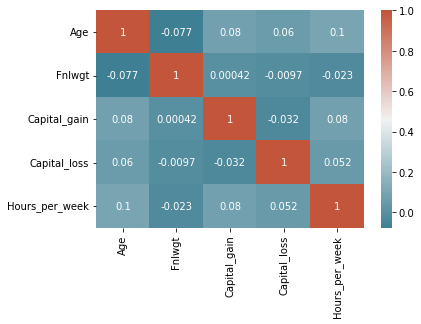

In [ ]:
variable = ["Age","Fnlwgt","Capital_gain","Capital_loss","Hours_per_week"]
corr = training_data1[variable].corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Generated correlation between various numerical features using heatmap.

The highest positive correlation is between age and hours_per_week.

The highest negative correlation is betweeen age and fnlwgt

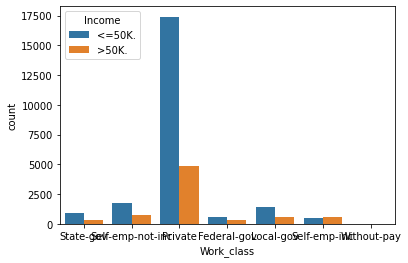

In [ ]:
sns.countplot(x='Work_class', hue='Income', data=training_data1);

Created a countplot with work_class.

Private class are high in numbers

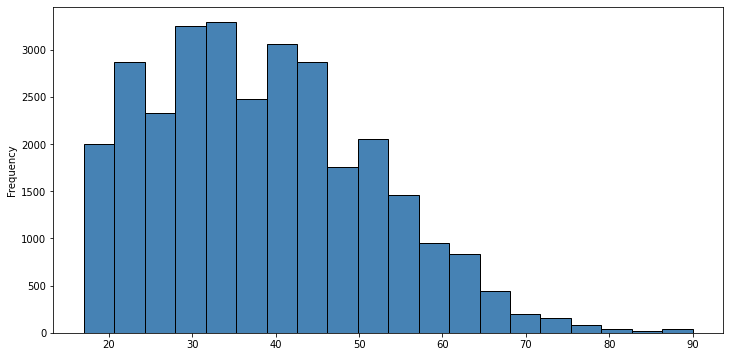

In [ ]:
training_data1['Age'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='steelblue',edgecolor='black')

Histogram is generated on age features.
People with ages between 30-35 are considered more compared to other ages.

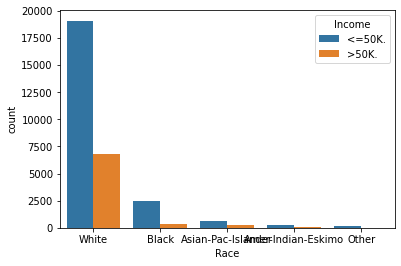

In [ ]:
sns.countplot(x='Race', hue='Income', data=training_data1);

Countplot is created for race. White people are considered more in the dataset

In [ ]:
pd.crosstab(training_data1['Education'], training_data1['Income'], margins=True)

Income,<=50K.,>50K.,All
Education,,,
10th,761,59,820
11th,989,59,1048
12th,348,29,377
1st-4th,145,6,151
5th-6th,276,12,288
7th-8th,522,35,557
9th,430,25,455
Assoc-acdm,752,256,1008
Assoc-voc,963,344,1307


Cross tab is created between Education and the Income.
People who did prof-school has more 50k Income percentage compared to other Education

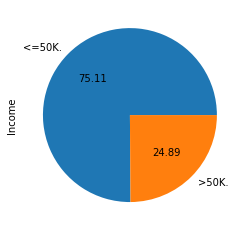

In [ ]:
training_data1['Income'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

Percentage of Income considered is given in a pie chart.

People with <=50K is considered more with people >50K

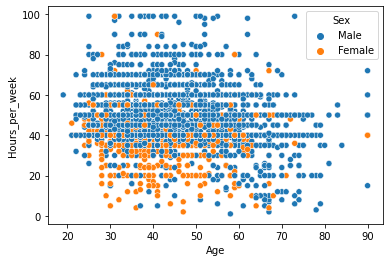

In [ ]:
Income_greater_50K = training_data1[training_data1["Income"]==">50K."]
sns.scatterplot(Income_greater_50K["Age"], Income_greater_50K["Hours_per_week"], hue=Income_greater_50K['Sex'])

Scatterplot is considered between Age and hours_per_week for people earning more than 50K. The plot is dense beween the age 30-40 and between hours_per week 40-60. As per the plot, male is getting more than 50k compared to female

Machine Learning Model

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


# instantiate the model
gnb = GaussianNB()
#5-fold cross validation
scores = cross_val_score(gnb, X_train, y_train, cv = 5, scoring='accuracy')
print('5 Cross validation score of GaussianNB model:{}'.format(scores))
# fit the model
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_train)
y_pred = gnb.predict(X_test)

print('Model accuracy score of GaussianNB model: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training accuracy score of GaussianNB model: {0:0.4f}'. format(accuracy_score(y_train, y_pred1)))
print('The Classification Report of GaussianNB model\n\n'+(classification_report(y_test, y_pred)))

5 Cross validation score of GaussianNB model:[0.79886381 0.79821867 0.80190418 0.79484029 0.80666462]
Model accuracy score of GaussianNB model: 0.8009
Training accuracy score of GaussianNB model: 0.8001
The Classification Report of GaussianNB model

              precision    recall  f1-score   support

      <=50K.       0.82      0.95      0.88     12435
       >50K.       0.66      0.32      0.43      3846

    accuracy                           0.80     16281
   macro avg       0.74      0.64      0.66     16281
weighted avg       0.78      0.80      0.77     16281



In [ ]:
# train a DecisionTreeClassifier on the training set

from sklearn.tree import DecisionTreeClassifier

# instantiate the model

clf = DecisionTreeClassifier()

#5-fold cross validation
scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring='accuracy')
print('5 Cross validation score of DecisionTreeClassifier model:{}'.format(scores))

# fit the model
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_train)
y_pred = clf.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred1)))
print('The Classification Report of DecisionTreeClassification model\n\n'+classification_report(y_test, y_pred))

5 Cross validation score of DecisionTreeClassifier model:[0.84216183 0.84566953 0.85181204 0.85150491 0.85457617]
Model accuracy score: 0.8519
Training accuracy score: 0.8521
The Classification Report of DecisionTreeClassification model

              precision    recall  f1-score   support

      <=50K.       0.87      0.95      0.91     12435
       >50K.       0.77      0.53      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.82      0.74      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [ ]:
# train a LogisticRegression on the training set

from sklearn.linear_model import LogisticRegression

# instantiate the model

lr= LogisticRegression( solver='lbfgs',max_iter = 700)

#5-fold cross validation
scores = cross_val_score(lr, X_train, y_train, cv = 5, scoring='accuracy')
print('5 Cross validation score of Logistic Regression model:{}'.format(scores))

# fit the model
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_train)
y_pred = lr.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred1)))
print('The Classification Report of Logistic Regression model\n\n'+classification_report(y_test, y_pred))

5 Cross validation score of Logistic Regression model:[0.82250883 0.8240172  0.8264742  0.82324939 0.82877764]
Model accuracy score: 0.8262
Training accuracy score: 0.8253
The Classification Report of Logistic Regression model

              precision    recall  f1-score   support

      <=50K.       0.85      0.94      0.89     12435
       >50K.       0.71      0.45      0.55      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.70      0.72     16281
weighted avg       0.81      0.83      0.81     16281



We can find that the DecisionTreeClassifier overfits as the training accuracy is 1.000. In order to tackle this, we can change the max_depth..

The LogicalRegression performs well compared to other ml models as it has more accuracy score.  Decision Tree outperforms other ml models if we set max_depth to 5 as it avoids overfitting. Gaussian NB considers all features to be conditionally independent and thats the reason for its underperformance